### Bank Customer Churn Analysis

This notebook explores the "Bank Customer Churn" dataset to analyze the customer churn (cases whereby a customer discontinues the relationship with the bank and stops using the banks products/services).
There is need to analyse the categories and segments of customers who have churned so it can be easier to devise strategies on how to better target these categories of customers to ensure customer retention.

The dataset used in this analysis contains information about bank customers, including their demographic details, credit score, account balance, tenure, and various other features. The target variable is "Exited," which indicates whether a customer has churned (1) or not (0). By exploring the data and performing data analysis, feature engineering, and predictive modeling, we aim to identify patterns and factors associated with customer churn.

The notebook covers the following key steps:
* Loading of dataset and quick glance of the dataset
* Exploratory data analysis and visualisation to gather insights
* Feature selection to best identify important features to aid predictive modelling
* Predictive modelling
* Model evaluation and insights

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

#### Dataset Information

* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.
* Complain—customer has complaint or not.
* Satisfaction Score—Score provided by the customer for their complaint resolution.
* Card Type—type of card hold by the customer.
* Points Earned—the points earned by the customer for using credit card.

[Dataset Credit](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?sort=published)

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

In [2]:
# loading the dataset
df = pd.read_csv('Customer-Churn-Records.csv', sep=',')

df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [3]:
df = df.drop(columns='RowNumber')
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [4]:
df.dtypes

CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

#### Share of churn vs no_churn

0 = Retained
1 = Churned

In [6]:
retain_cases = df[df['Exited'] == 0]
churn_cases = df[df['Exited'] == 1]

In [7]:
churn_cases['Exited'].count()

2038

In [8]:
retain_cases['Exited'].count()

7962

In [9]:
# total number of records
len(df.index)

10000

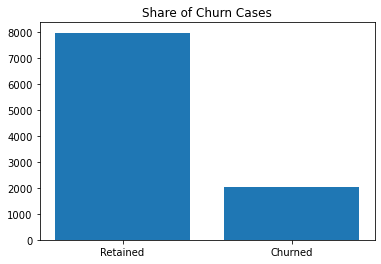

In [10]:
ex_counts = df['Exited'].value_counts()

# plot of the exited field
plt.bar(['Retained', 'Churned'], ex_counts.values)
plt.title('Share of Churn Cases')
plt.show()

#### Check for missing records

In [11]:
# Check for missing values
print(df.isnull().sum())

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


#### EDA & Insights

We analyse the various categories of customers to identify the ones who churned and then work out a solution to ensure retention going forward.

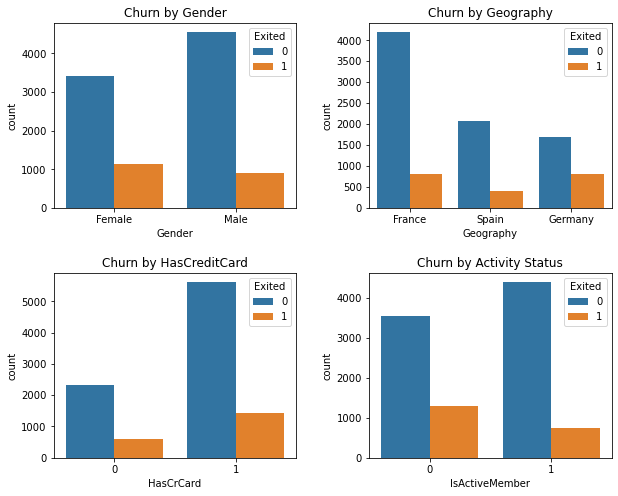

In [12]:
# data visualisations

fig = plt.figure(figsize = [10, 8])

fig.tight_layout()

# churn by gender
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')

# churn by geography
plt.subplot(2, 2, 2)
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')

# churn by HasCreditCard
plt.subplot(2, 2, 3)
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by HasCreditCard')

# churn by IsActiveMember
plt.subplot(2, 2, 4)
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Activity Status')

plt.subplots_adjust(wspace= 0.3, hspace= 0.35)
plt.show()

#### Insights

* **Churn by Gender**: From the visualisation, slightly a little more amount of female customers churned compared to the male customers. This doesn't seem to be too significant to conclude that the gender of customers determines if they churn or not.

* **Churn by Geography**: It is observed that Germany and France have a similar amount of customers who churned as compared to Spain which has the least among the three countries. Further investigation could be carried out to identify why this is so. But then, the relative differences between the amount of customers who churned and those retained can also be considered i.e., France has a high amount of customers retained relative to the amount who churned as compared to the Germany office.

* **Churn by HasCrCard**: Customers who have credit cards has a higher amount of customer churns than that of customers with no credit card.

* **Churn by Activity Status**: The visualisation shows that customers who are not active tend to churn as compared to those who are active.

#### Exploration of Churn by Age Group

In [13]:
# creating an age group field to bin the ages of customers
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], 
                        labels=['<30', '30-40', '40-50', '50-60', '60+'])
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50


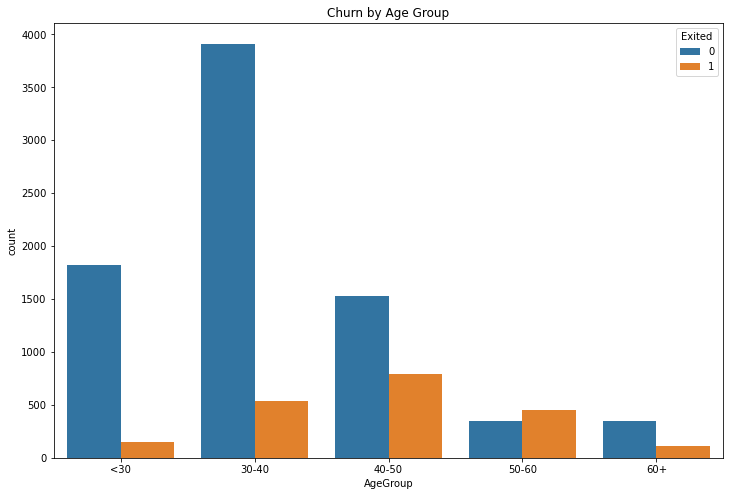

In [14]:
# churn by age group
plt.figure(figsize = [12, 8])
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Churn by Age Group')

plt.show()

It is observed that the age group of 40-50 has the highest customer churn but if we take into consideration the ratio of retention to churn, the age group of 50-60 has a high figure.
There is need to identify the key factors that lead to customer churn in these age groups (40-50, 50-60).

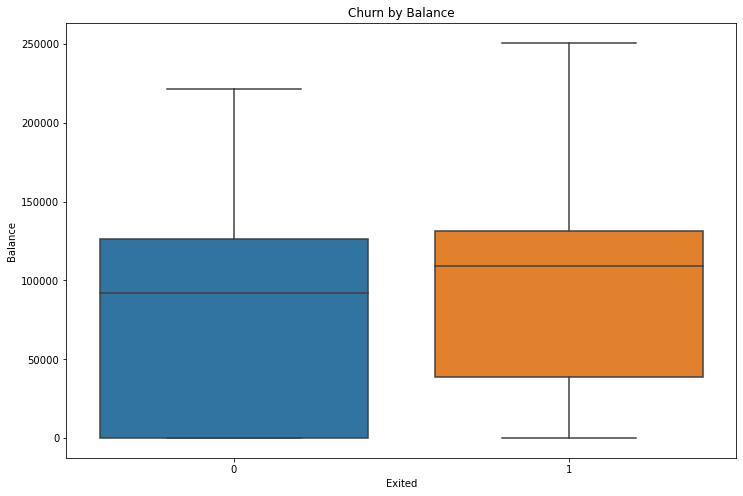

In [15]:
# churn by balance
plt.figure(figsize = [12, 8])
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Churn by Balance')

plt.show()

The really is not obvious distinction in the distribution of the account balances for customers who churned and those retained.

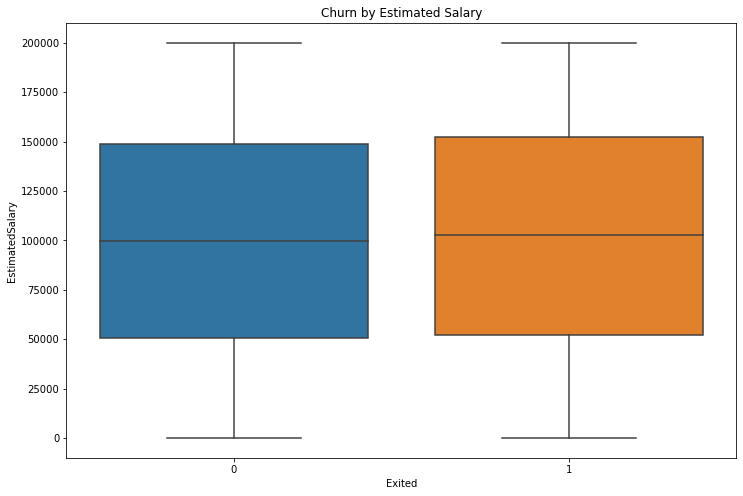

In [16]:
# churn by Estimated Salary
plt.figure(figsize = [12, 8])
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Churn by Estimated Salary')

plt.show()

#### Exploration of Churn by Tenure

In [35]:
# creating an tenure group field to bin the tenure of customers
df['TenureGrp'] = pd.cut(df['Tenure'], bins=[0, 4, 8, np.inf], 
                        labels=['<4yrs', '4-8yrs', '8yrs+'])
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,TenureGrp
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50,<4yrs
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50,<4yrs
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50,4-8yrs


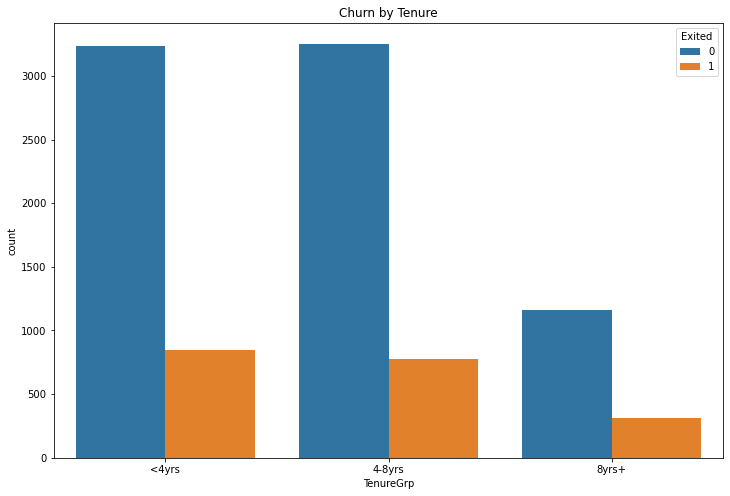

In [36]:
# churn by age group
plt.figure(figsize = [12,8])
sns.countplot(x='TenureGrp', hue='Exited', data=df)
plt.title('Churn by Tenure')

plt.show()

From the above plot, looking at the customers who churned it is observed that customers who have been with the bank for less than 2 years have the highest amount of churn, while customers that have been with the bank for more than 8 years have the least amount of churn.

### Feature Selection and Predictive Modelling

In order to be able to train the model, we need to drop irrelevant fields (that is, fields containing unique records like the surname and the customerId). Then next, we would try to identify the best features that can be used to predict if a customer would churn.

In [19]:
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,TenureGrp
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50,<2yrs
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50,<2yrs
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50,6-8yrs


In [20]:
# so as to have our original dataset we assign to a new variable
df1 = df

df1.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,TenureGrp
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50,<2yrs
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50,<2yrs
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50,6-8yrs


In [21]:
df1.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'AgeGroup', 'TenureGrp'],
      dtype='object')

In [22]:
# dropping the irrelevant columns
df1 = df1.drop(columns=['CustomerId', 'Surname', 'AgeGroup', 'TenureGrp'])

df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [23]:
df1.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [24]:
df1_target = df1['Exited'] # contains just the target
df1_var = df1.drop(columns='Exited') # cotains the predictors

In [25]:
df1_target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
df1_var.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456


In [27]:
# Get the column names with object data type
object_columns = df1_var.select_dtypes(include='object').columns

# Convert the columns to categorical
df1_var[object_columns] = df1_var[object_columns].astype('category')

print(df1_var.dtypes)

CreditScore              int64
Geography             category
Gender                category
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Complain                 int64
Satisfaction Score       int64
Card Type             category
Point Earned             int64
dtype: object


#### Encoding Category names 

* **Gender**: Male - 0, Female - 1
* **Geography**: France - 1, Spain - 2, Germany - 3
* **Card Type**: Diamond - 1, Gold - 2, Platinum - 3, Silver - 4

In [28]:
# encoding the categories
df1_var['Gender'] = df1_var['Gender'].cat.rename_categories({'Male': 0, 'Female': 1})

df1_var['Geography'] = df1_var['Geography'].cat.rename_categories({'France': 1, 'Spain': 2, 'Germany': 3})

df1_var['Card Type'] = df1_var['Card Type'].cat.rename_categories({'DIAMOND': 1, 'GOLD': 2, 'PLATINUM': 3, 'SILVER': 4})

df1_var.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,1,1,42,2,0.00,1,1,1,101348.88,1,2,1,464
1,608,2,1,41,1,83807.86,1,0,1,112542.58,1,3,1,456
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1,3,1,377
3,699,1,1,39,1,0.00,2,0,0,93826.63,0,5,2,350
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0,5,2,425


In [29]:
print(df1_var.dtypes)

CreditScore              int64
Geography             category
Gender                category
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Complain                 int64
Satisfaction Score       int64
Card Type             category
Point Earned             int64
dtype: object


In [30]:
# Get the column names with categorical data type
cat_columns = df1_var.select_dtypes(include='category').columns

# Convert the categorical to int
df1_var[cat_columns] = df1_var[cat_columns].apply(np.int64)

print(df1_var.dtypes)

CreditScore             int64
Geography               int64
Gender                  int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Card Type               int64
Point Earned            int64
dtype: object


In [31]:
df1_var.shape

(10000, 14)

#### Feature Selection

In order to compare if these selected features give a better chance of prediction than using all the features, first we identify 8 best features to utilize for the prediction.
We use a F-test to retrieve the 8 best features for the dataset.

In [32]:
# Apply the KBest feature selection

k = 8  # Number of best features to select
kbest = SelectKBest(score_func=f_classif, k=k)
selected_features = kbest.fit_transform(df1_var, df1_target)

# Get the indices of the selected features
selected_indices = kbest.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = df1_var.columns[selected_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
CreditScore
Geography
Gender
Age
Balance
NumOfProducts
IsActiveMember
Complain


In [33]:
# dataset with the best features
df1_var_best = df1_var[selected_feature_names]
df1_var_best.head(3)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Complain
0,619,1,1,42,0.00,1,1,1
1,608,2,1,41,83807.86,1,1,1
2,502,1,1,42,159660.80,3,0,1
